Authors: Salvador Galarza, Abraham Hill

In [40]:
#Importing Libraries
from matplotlib import pyplot as plt
import numpy as np
import csv
import pandas as pd
import scipy.spatial
import random
from sklearn.neighbors import KNeighborsClassifier
import pickle
import scikitplot as skplt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import json
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import math 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from regressors import stats
import scipy.stats as st
from sklearn import linear_model
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifier, Lasso

ModuleNotFoundError: No module named 'scikitplot'

## Regularized linear regression.

#### (b) Tell us about the data.

In [41]:
train_path = "train.csv"
test_path = "test.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [42]:
np_train = df_train.to_numpy()
np_test = df_test.to_numpy()

In [43]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### How many samples are there in the training set? How many features?

In [44]:
# How many samples are there in the training set? 
rows, columns = df_train.shape
# How many features?
print("The data has {} samples, and {} features.".format(rows, columns))

The data has 1460 samples, and 81 features.


#### Which features are categorical?

In [45]:
# Which features are categorical?
cat = []
for f in df_train:
    if type(df_train[f][0]) == str:
        cat.append(f)
print("Categorical Features = {}".format(cat))

Categorical Features = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


#### (c) What variables seem to be important? Which seem to correlate with the sale price? Plot the relationship between sale price and year of sale, garage area, lot area, and other variables of your choice. Choose 7 variables and, along with the response variable, make a scatterplot.

In [46]:
## Choosing 7 variables
# LotArea,OverallQual,YearBuilt,YearRemodAdd,CentralAir,1stFlrSF,2ndFlrSF,KitchenAbvGr,BedroomAbvGr
import warnings; warnings.simplefilter('ignore')

selected_features = ['SalePrice','YrSold','GarageArea','LotArea','OverallQual','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','BedroomAbvGr']
df_selected = df_train[selected_features]

test_min = df_selected['SalePrice'].min()
test_max = df_selected['SalePrice'].max()

df_selected.fillna(df_selected.mean())

for feature in selected_features:
    df_selected[feature] = (df_selected[feature] - df_selected[feature].min()) / (df_selected[feature].max() - df_selected[feature].min())    

df_selected.head()

,SalePrice,YrSold,GarageArea,LotArea,OverallQual,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,BedroomAbvGr
0,0.241078,0.50,0.386460,0.033420,0.666667,0.949275,0.883333,0.119780,0.413559,0.375
1,0.203583,0.25,0.324401,0.038795,0.555556,0.753623,0.433333,0.212942,0.000000,0.375
2,0.261908,0.50,0.428773,0.046507,0.666667,0.934783,0.866667,0.134465,0.419370,0.375
3,0.145952,0.00,0.452750,0.038561,0.666667,0.311594,0.333333,0.143873,0.366102,0.375
4,0.298709,0.50,0.589563,0.060576,0.777778,0.927536,0.833333,0.186095,0.509927,0.500


In [47]:
selected_features_test = ['YrSold','GarageArea','LotArea','OverallQual','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','BedroomAbvGr']

dfx_test = df_test[selected_features_test]

dfx_test.fillna(dfx_test.mean())

for ft in selected_features_test:
    dfx_test[ft] = (dfx_test[ft] - dfx_test[ft].min()) / (dfx_test[ft].max() - dfx_test[ft].min()) 
                   
# for ft in selected_features_test:
#     print(dfx_test[dfx_test[ft]>1])

dfx_test

,YrSold,GarageArea,LotArea,OverallQual,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,BedroomAbvGr
0,1.0,0.490591,0.184147,0.444444,0.625954,0.183333,0.104309,0.000000,0.333333
1,1.0,0.209677,0.232124,0.555556,0.603053,0.133333,0.196672,0.000000,0.500000
2,1.0,0.323925,0.224197,0.444444,0.900763,0.800000,0.111135,0.376477,0.500000
3,1.0,0.315860,0.154326,0.555556,0.908397,0.800000,0.110708,0.364125,0.500000
4,1.0,0.340054,0.064121,0.777778,0.862595,0.700000,0.186220,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...
1454,0.0,0.000000,0.008453,0.333333,0.694656,0.333333,0.029650,0.293233,0.500000
1455,0.0,0.192204,0.007691,0.333333,0.694656,0.333333,0.029650,0.293233,0.500000
1456,0.0,0.387097,0.336115,0.444444,0.618321,0.766667,0.174275,0.000000,0.666667
1457,0.0,0.000000,0.162724,0.444444,0.862595,0.700000,0.120094,0.000000,0.500000


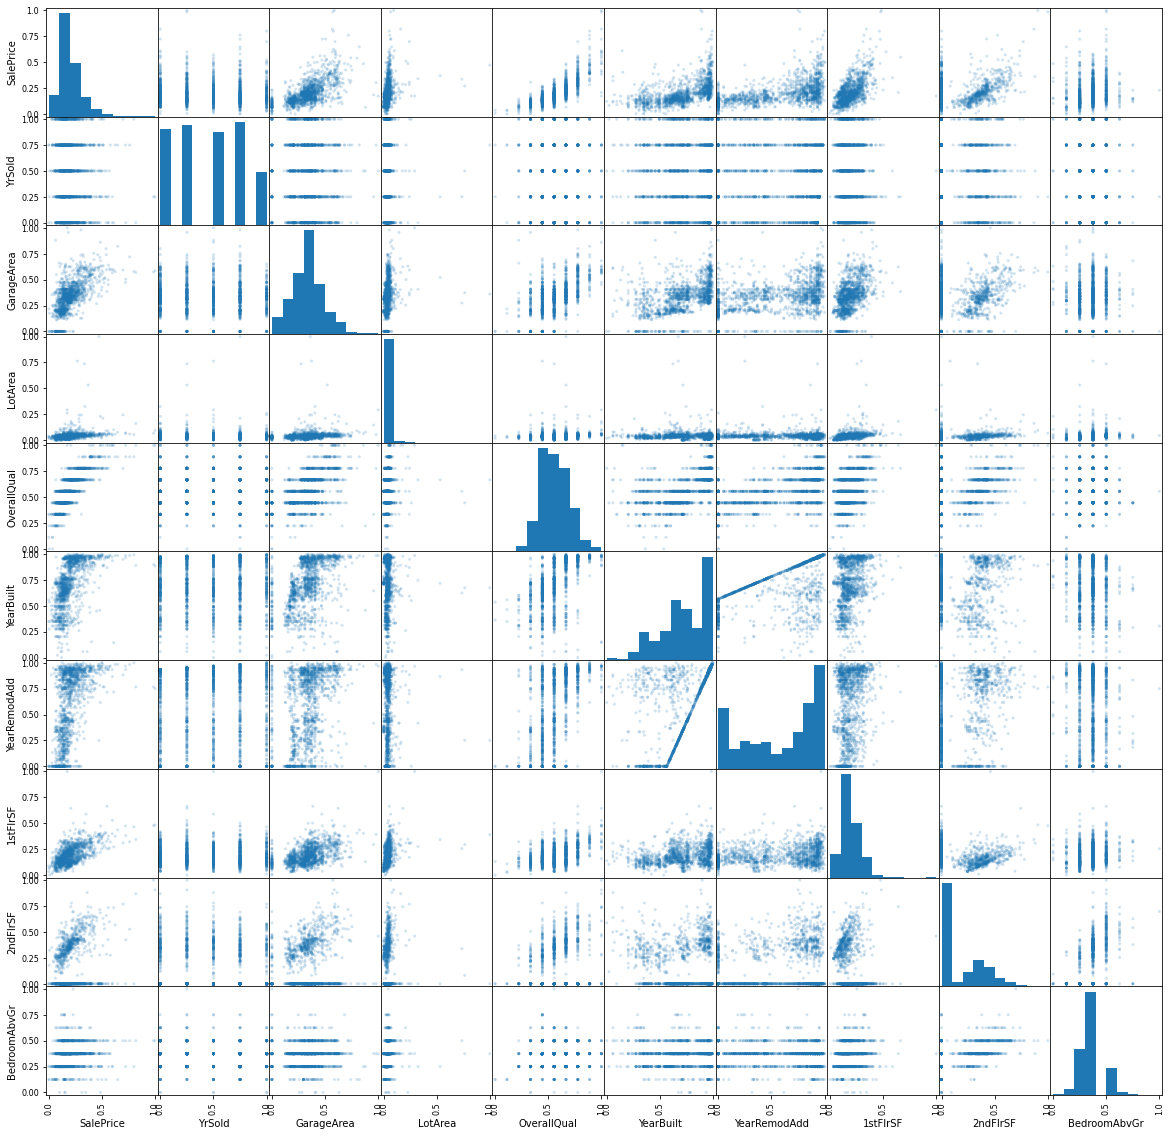

In [48]:
## Making a scatterplot
plt.rcParams['figure.figsize'] = [20, 20]
pd.plotting.scatter_matrix(df_selected, alpha=0.2)
plt.show()
#The chosen features/variables are positively correlated with SalePrice

Variables GarageArea, YearBuilt, OverallQuality, 2ndFlrSF apear to be important. Based on our scatter plot they are positively correlated with SalePrice.

#### (e) Split the training data into a training (80%) and test set (20%). Try to run a variety of regression methods using sklearn methods:

In [49]:
## Split the training data into a training (80%) and test set (20%).
# df_selected = df_train[selected_features]
x = df_selected.drop(['SalePrice'],axis = 1)
y = df_selected.SalePrice
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=4)

NameError: name 'train_test_split' is not defined

###### Ordinary least squares

In [31]:
## Running a variety of regression methods using sklearn methods:
# • Ordinary least squares
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
reg.score(x_test, y_test)*100
# y_pred[0]

# Brief description of how well it works and why that might be and report the
# test accuracy?

NameError: name 'LinearRegression' is not defined

OLS works well due to the linear correlation between the selected variables and SalesPrice. OLS has an accuracy of 83.45%.

##### k-Nearest Neighbors with 10-fold cross validation

In [32]:
# • k-Nearest Neighbors with 10-fold cross validation to choose k
# import warnings;
# warnings.filterwarnings('ignore');
kcv_scores = []

## range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []
k_scores_mean = []

#loop through k vals
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    k_scores.append(scores)
    k_scores_mean.append(scores.mean())
    
min_mean = min(k_scores_mean)
ind = k_scores_mean.index(min_mean)
se = k_scores[ind].std()/math.sqrt(len(k_scores[ind]))
ln = min_mean+se

for j in k_scores_mean:
    if j < ln:
        print("simplest k: {}".format(10+ k_scores_mean.index(j)+1))
        break

NameError: name 'KNeighborsRegressor' is not defined

In [33]:
#knn with best k
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn.score(x_test, y_test)*100

# Brief description of how well it works and why that might be and report the
# test accuracy?

NameError: name 'KNeighborsRegressor' is not defined

Knn does not work as well as OLS since the model is mmore complex than the linear model resulting in a larger variance. Knn has an accuracy of 75.21%.

In [34]:
# • Ridge regression with 10-fold cross validation to chose λ
ridge = RidgeCV(cv=10).fit(x_train, y_train)
ridge.score(x_test, y_test)*100

# Brief description of how well it works and why that might be and report the
# test accuracy?

NameError: name 'RidgeCV' is not defined

Ridge regression results in higher accuracy than Knn as it benefits from variable independence. Ridge regression has an accuracy of 82.45%.

In [35]:
# • LASSO with 10-fold cross validation to chose λ
lasso = LassoCV(cv=10, random_state=1).fit(x_train, y_train)
lasso.score(x_test, y_test)*100

# Brief description of how well it works and why that might be and report the
# test accuracy?

NameError: name 'LassoCV' is not defined

Lasso regression results with a very similar score as ridge regression. This is due to the multicollinearity of the variables used. Ridge regression has an accuracy of 82.45%.

##### Backward stepwise (linear) regression with 10-fold cross validation

In [18]:
#functions for splitting and merging data

def split_data(data_df, k):
    #returns a list of the k folds
    
    n = len(data_df)
    fold_size = int(n/k)
    
    data_folds = []
    
    for i in range(k - 1):
        data_folds.append(data_df[fold_size*i : fold_size*(i + 1)]) 
    
    data_folds.append(data_df[fold_size*(k - 1) : n])
    
    return data_folds

#takes in a list of folds as dfs and returns merged df
def merge_folds(folds):
    
    merged_data = pd.concat(folds)
    
    return merged_data


    


In [19]:
S = ['YrSold','GarageArea','LotArea','OverallQual','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','BedroomAbvGr']

k = 10
def compute_Z(lin_reg, features):
    #returns a list of Z-scores, one for each feature
    #not 100% sure what k is (in sigma^)
    
    y_pred = lin_reg.predict(x_test[features])
    
    #get Beta hat
    beta_pred = lin_reg.coef_

    #compute sigma hat
    var_pred = 0
    n = len(y_pred)

    for i in range(n):
        var_pred += (y_pred[i] - y_train.to_numpy()[i])**2

    var_pred = var_pred/(n - k - 1)
    stdev_pred = math.sqrt(var_pred)

    #compute v
    #v_j is the j, j entry of v
    x_matrix = x_train[S].to_numpy()
    v = np.linalg.inv(np.matmul(np.matrix.transpose(x_matrix), x_matrix))

    #calculate Z for every j, put it in the list Z
    Z = []
    for j in range(len(S)):
        Z.append( beta_pred[j]/( stdev_pred * math.sqrt(v[j][j]) ) )
    
    return Z

#returns a tuple of (the best k features, OLS score with those features)
def bsr(k, S, train_data, train_labels, test_data, test_labels):
    
    #Backwards stepwise regression:
    #start with all features in S, and do OLS
    #remove the feature with the lowest Z-score (least influential)
    #do OLS again, and repeat until only k features remain
    
    if k > len(S):
        print("k must be less than the number of features in S")
        return None
    
    while len(S) > k:
        #ols on S
        lreg = LinearRegression().fit(train_data[S], train_labels)
        
        #compute the Z scores
        Z = compute_Z(lreg, S)
        
        #take the absolute value of each Z-score
        for j in range(len(Z)):
            if Z[j] < 0:
                Z[j] = Z[j]*-1
        
        #find and remove the least influential feature from S
        min_Z = min(Z)
        min_index = Z.index(min_Z)
        del S[min_index]
    
    best_lreg = LinearRegression().fit(train_data[S], train_labels)
    best_score = best_lreg.score(test_data[S], test_labels)
    return (S, best_score)
       
print(bsr(4, S, x_train, y_train, x_test, y_test))

NameError: name 'x_train' is not defined

In [ ]:
#cross-val

num_folds = 10
S = ['YrSold','GarageArea','LotArea','OverallQual','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','BedroomAbvGr']
data_folds = split_data(x_train, num_folds)
label_folds = split_data(y_train, num_folds)

avg_r2s_k = []

#for each possible number of features k:
for k in range(len(S)):
    
    r2_sum = 0
    
    #for each fold
    for i in range(num_folds):
        
        # test data is the i-th fold
        test_data = data_folds[i]
        test_labels = label_folds[i]
        
        #list of folds other than fold i
        train_data_folds = data_folds[:i] + data_folds[i+1:] 
        train_label_folds = label_folds[:i] + label_folds[i+1:]
        
        #merge the folds to get training data:
        train_data = merge_folds(train_data_folds)
        train_labels = merge_folds(train_label_folds)
        
        bsr_var = bsr(k + 1, S, train_data, train_labels, test_data, test_labels)
        
        #print(k + 1, i, bsr(4, S, train_data, train_labels, test_data, test_labels))
        
        r2_sum += bsr_var[1]
        #print("sum =", r2_sum)
        
    avg_r2s_fold = r2_sum/(num_folds)
    #print("avg =", avg_r2s_fold)
    
    avg_r2s_k.append(avg_r2s_fold)
    
#print(avg_r2s_k)


##### Forward stepwise (linear) regression with 10-fold cross validation

In [38]:
# • Forward stepwise (linear) regression with 10-fold cross validation to choose k (number
# of features)
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(2)
# xt = poly.fit_transform(x_train)

# poly = PolynomialFeatures(2)
# xtt = poly.fit_transform(x_test)

#returns a tuple of (the best k features, OLS score with those features)
def fsr(k, S):
    #start with no features, add the one that reduces least squared residuals the most
    #repeat until k features have been selected
    
    S_select = []
    #list of the features we have selected
    S_not = S
    #list of the features we haven't selected
    
    while len(S_select) < k:
        
        #do regression, find R squared & append to r_sq list
        r_sq = []
        for feat in S_not:
            lreg = LinearRegression().fit(x_train[S_select + [feat]], y_train)
            score = lreg.score(x_test[S_select + [feat]], y_test)
            r_sq.append(score)
        
        #find the best feature
        max_r2 = max(r_sq)
        max_index = r_sq.index(max_r2)
        
        #add the best feature to S_select & remove from S_not
        S_select.append(S_not[max_index])
        del S_not[max_index]

    best_reg = LinearRegression().fit(x_train[S_select], y_train)
    best_score = best_reg.score(x_test[S_select], y_test)
    
    return (S_select, best_score)
     
print(fsr(5, S))

NameError: name 'LinearRegression' is not defined

In [ ]:
#cross-val

num_folds = 10
S = ['YrSold','GarageArea','LotArea','OverallQual','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','BedroomAbvGr']
data_folds = split_data(x_train, num_folds)
label_folds = split_data(y_train, num_folds)

avg_r2s_k = []

#for each possible number of features k:
for k in range(len(S)):
    
    r2_sum = 0
    
    #for each fold
    for i in range(num_folds):
        
        # test data is the i-th fold
        test_data = data_folds[i]
        test_labels = label_folds[i]
        
        #list of folds other than fold i
        train_data_folds = data_folds[:i] + data_folds[i+1:] 
        train_label_folds = label_folds[:i] + label_folds[i+1:]
        
        #merge the folds to get training data:
        train_data = merge_folds(train_data_folds)
        train_labels = merge_folds(train_label_folds)
        
        bsr_var = fsr(k + 1, S, train_data, train_labels, test_data, test_labels)
        
        #print(k + 1, i, fsr(4, S, train_data, train_labels, test_data, test_labels))
        
        r2_sum += bsr_var[1]
        #print("sum =", r2_sum)
        
    avg_r2s_fold = r2_sum/(num_folds)
    #print("avg =", avg_r2s_fold)
    
    avg_r2s_k.append(avg_r2s_fold)
    
#print(avg_r2s_k)


#### (f) Repeat the above, except for OLS, after adding all the quadratic features: Xij Xik for all j,k = 1,...,p (this includes X^2 ij). (Backward/forward stepwise regression are optional).

In [36]:
# (f) Repeat the above, except for OLS, after adding all the quadratic features: Xij Xik for all j,k =
# 1,...,p (this includes X^2 ij). (Backward/forward stepwise regression are optional).
# • k-Nearest Neighbors with 10-fold cross validation to choose k
# import warnings;
# warnings.filterwarnings('ignore');

kcv_scores = []

## range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []
k_scores_mean = []

#loop through k vals
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, xt, y_train, cv=10)
    k_scores.append(scores)
    k_scores_mean.append(scores.mean())
    
min_mean = min(k_scores_mean)
ind = k_scores_mean.index(min_mean)
se = k_scores[ind].std()/math.sqrt(len(k_scores[ind]))
ln = min_mean+se

for j in k_scores_mean:
    if j < ln:
        print("simplest k: {}".format(10+ k_scores_mean.index(j)+1))
        break
##################
#knn with best k
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(xt, y_train)
y_pred = knn.predict(xtt)
print('knn acc: ', knn.score(xtt, y_test)*100)

# Brief description of how well it works and why that might be and report the
# test accuracy?
##################
# • Ridge regression with 10-fold cross validation to chose λ
ridge = RidgeCV(cv=10).fit(xt, y_train)
print('ridge acc: ', ridge.score(xtt, y_test)*100)

# Brief description of how well it works and why that might be and report the
# test accuracy?
##################
# • LASSO with 10-fold cross validation to chose λ
lasso = LassoCV(cv=10, random_state=1).fit(xt, y_train)
print('lasso acc: ', lasso.score(xtt, y_test)*100)

# Brief description of how well it works and why that might be and report the
# test accuracy?

NameError: name 'KNeighborsRegressor' is not defined

#### (g) Which variables are being retained by LASSO and the stepwise regression models and which are regularized away? Do these variables match your intuitions about which variables are important and which are not? Compare this to (d).

In [ ]:
# (g) Which variables are being retained by LASSO and the stepwise regression models and which
# are regularized away? Do these variables match your intuitions about which variables are
# important and which are not? Compare this to (d).

# lasso.get_params(deep=True)
# lasso.coef_
# print(list(zip(lasso.coef_, selected_features)))


#Lasso
feature_dict = {}
for coef, feat in zip(lasso.coef_,selected_features):
    feature_dict[feat] = coef
print(feature_dict)

print("\n")
print("LASSO")
print("Retained Variables: 'YrSold','GarageArea','OverallQual','YearBuilt','YearRemodAdd','1stFlrSF' Regularized Away: 'SalePrice': 0.0, 'LotArea': 0.0, '2ndFlrSF': -0.0 These variables do match our intuition since it kept most of the original 7 we chose except for 2 of them.")
print("\n")

#Backward stepwise
print("BSR")
print("\n")
#Forward stepwise
print("FSR")
print("\n")

#### (h) Train your best-performing classifier with all of the training data, and generate test labels on the Kaggle test set. Submit your results to Kaggle and report the accuracy. Is it higher or lower than the cross validation accuracy? Why might that happen? Is it higher or lower than the held-out validation accuracy? Why might that happen?

In [ ]:
# (h) Train your best-performing classifier with all of the training data, and generate test labels on
# the Kaggle test set. Submit your results to Kaggle and report the accuracy. Is it higher or lower
# than the cross validation accuracy? Why might that happen? Is it higher or lower than the
# held-out validation accuracy? Why might that happen?

# df_test
# dfx_test
# df_test = df_test.dropna()
# df_test
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(dfx_test.fillna(df_selected.mean()))

# y_pred = reg.predict(dfx_test.dropna())

print(len(y_pred))
# test_min
# test_max
ll = []
for i in y_pred:
    y_t = (i + test_min) * (test_max - test_min) 
    ll.append(y_t)
print(len(ll))

# ll
# dfx_test[dfx_test[selected_features_test]>1]

In [ ]:
ind_ll = list(range(1461,2920))
len(ind_ll)
k_pred = pd.DataFrame({'Id': ind_ll,'SalePrice': ll})
k_pred.to_csv('House_Prices_Pred.csv')

In [ ]:
from IPython.display import Image
Image(filename='kpic.png') 

## 2. Sentiment analysis of online reviews.

#### (a) Download Sentiment Labelled Sentences Data Set. There are three data files under the root folder. yelp_labelled.txt, amazon_cells_labelled.txt and imdb_labelled.txt. Parse each file with the specifications in readme.txt.

In [ ]:
import warnings; warnings.simplefilter('ignore')

amazon_path = "amazon_cells_labelled.txt"
df_amz = pd.read_csv(amazon_path, sep="	",header=None)

imdb_path = "imdb_labelled.txt"
df_imdb = pd.read_csv(imdb_path, sep="  	",header=None)

yelp_path = "yelp_labelled.txt"
df_yelp = pd.read_csv(yelp_path, sep="	",header=None)

len(df_amz)

##### Are the labels balanced? If not, what’s the ratio between the two labels? Explain how you process these files.

In [ ]:
# Are the labels balanced? If not, what’s the ratio between
# the two labels? Explain how you process these files.

amz_ratio = len(df_amz[df_amz[1] == 0])/len(df_amz[df_amz[1] == 1])

imdb_ratio = len(df_imdb[df_imdb[1] == 0])/len(df_imdb[df_imdb[1] == 1])

yelp_ratio = len(df_yelp[df_yelp[1] == 0])/len(df_yelp[df_yelp[1] == 1])

print("Ratios of 1s and 0s for all three data sets:")
print(amz_ratio,imdb_ratio,yelp_ratio)

#The file is read in and converted into a pandas dataframe. Once this is done we can count the rows/samples for
#wich values equal to 0 and 1 getting 500 for each. 
#The labels are balanced. All three files have exactly 500 positive (1) sentences and 500 negative (0) sentences.

The file is read in and converted into a pandas dataframe. Once this is done we can count the rows/samples for wich values equal to 0 and 1 getting 500 for each. Thus, the labels are balanced. All three files have exactly 500 positive (1) sentences and 500 negative (0) sentences.

#### (b) Pick your preprocessing strategy.

In [ ]:
# (b) Pick your preprocessing strategy. Since these sentences are online reviews, they may contain significant amounts of noise and garbage. You may or may not want to do one or all of
# the following. Explain the reasons for each of your decision (why or why not).

import string
import warnings; warnings.simplefilter('ignore')

dfs = [df_amz,df_imdb,df_yelp]
for df in dfs:
    for ind in range(len(df)):
        phrase = df[0][ind].lower()
        phrase = phrase.translate(str.maketrans('', '', string.punctuation))
        querywords = phrase.split()
        irrelevantwords = ['me','you','and', 'the', 'is', 'a', 'at', 'but', 'so', 'or', 'to','this','that','then','it','in','i']

        resultwords  = [word for word in querywords if word.lower() not in irrelevantwords]
        newphrase = ' '.join(resultwords)
        df[0][ind] = newphrase

print(df_amz)

# Explain the reasons for each of your decision (why or why not).
# We dont need the filler words or capital letters to identify the sentiment. (try removing punctuation)

We lowercased all of the words to make comparisons simpler as to not have "Good" be different than "good."
We did not use Lemmatization but we should have for the same conceptual reasoning as lowercasing the words.
We striped punctuation, but we understand that with more advanced parsing punctuation could tell us interesting things about the tone of the sentence.
We striped the stop words, e.g., “the”, “and”, “or” as we thought they are common in both positive and negative sentiment sentences. Thus they would reletively not be very valuable features.

#### (c) Split training and testing set. In this assignment, for each file, please use the first 400 instances for each label as the training set and the remaining 100 instances as testing set. In total, there are 2400 reviews for training and 600 reviews for testing.

In [ ]:
# Split training and testing set. In this assignment, for each file, please use the first 400 instances for each label as the training set and the remaining 100 instances as testing set. In
# total, there are 2400 reviews for training and 600 reviews for testing.
data_frames = [df_amz, df_imdb, df_yelp]
all_df = pd.concat(data_frames)

x = all_df.drop([1], axis = 1)
y = all_df[1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=4)
x_train[0][0]

#### (d) Bag of Words model. 

In [ ]:
# Find all unique words in training dataset
big_string = ""
x_train_np = x_train.to_numpy()
for i in range(len(x_train_np)):
    big_string = big_string + " " + str(x_train_np[i][0])

unique_words = set(big_string.split(" "))
unique_words_list = list(unique_words)[1:]

# for word_ind in range(len(unique_words_list)):
#     unique_words_list[word_ind] = unique_words_list[word_ind].translate(str.maketrans('', '', string.punctuation))
unique_words_list[:10]
# # print(big_string)
# print(unique_words)
# print(str(x_test[0][0]))
# print(set(str(x_test[0][209]).split(" ")))
# cant use testing set here because by definiftion we make predictions on the tetsing set 
# based on data from the training set.
# Thus having features from the testing set beforehand would defeat this purpose.

In [ ]:
import warnings; warnings.simplefilter('ignore')

x_train[unique_words_list] = 0
x_train[0][433]

In [ ]:
import warnings; warnings.simplefilter('ignore')

x_test[unique_words_list] = 0
x_test[0][1]

In [ ]:
#Implement the bag of words model training
import warnings; warnings.simplefilter('ignore')

indices = []
for phrase in x_train[0]:
    phrase_id = x_train[x_train[0]==phrase].index.values[0]
    indices.append(phrase_id)
    for unique_word in unique_words_list:
        phrase_words = list(phrase.split(" "))
        if unique_word in phrase_words:
            x_train.loc[x_train[0] == phrase, unique_word] += 1
#             x_train[unique_word][]
#             x_train[x_train[0] == phrase][unique_word] += 1
#             if x_train[x_train[0] == phrase]:
#             x_train[unique_word][phrase_id] += 1

x_train_count = x_train.copy(deep=True)
x_train

In [ ]:
#Implement the bag of words model testing
import warnings; warnings.simplefilter('ignore')

indices = []
for phrase in x_test[0]:
    phrase_id = x_test[x_test[0]==phrase].index.values[0]
    indices.append(phrase_id)
    for unique_word in unique_words_list:
        phrase_words = list(phrase.split(" "))
        if unique_word in phrase_words:
            x_test.loc[x_test[0] == phrase, unique_word] += 1
#             x_train[unique_word][]
#             x_train[x_train[0] == phrase][unique_word] += 1
#             if x_train[x_train[0] == phrase]:
#             x_train[unique_word][phrase_id] += 1
x_test_count = x_test.copy(deep=True)
x_test

##### Report feature vectors of any two reviews in the training set.

In [ ]:
x_train[x_train[0] == "sucked most of stuff does not work with my phone"]

In [ ]:
x_train[x_train["astronaut"]>0]

##### (e) Pick your postprocessing strategy. We chose to standardize the data by subtracting the mean and dividing by the variance.

In [ ]:
# (e) Pick your postprocessing strategy.
## Standardizing training data
import warnings; warnings.simplefilter('ignore')

for feat in unique_words_list:
#     x_train[feat]
    x_train[feat] = (x_train[feat]-x_train[feat].mean())/(x_train[feat].var())

x_train
# x_train_ngram = (x_train_ngram-x_train_ngram.mean(axis=0))/x_train_ngram.var(axis=0)

In [ ]:
## Standardizing testing data

import warnings; warnings.simplefilter('ignore')

for feat in unique_words_list:
#     x_train[feat]
    x_test[feat] = (x_test[feat]-x_test[feat].mean())/(x_test[feat].var())

x_test

In [ ]:
#Cleaning training data
x_train = x_train.fillna(0)
x_train

In [ ]:
#Cleaning testing data
x_test = x_test.fillna(0)
x_test

#### (f ) Sentiment prediction. Train a naive Bayes model on the training set and test on the testing set. Report the classification accuracy and confusion matrix.

In [ ]:
## Bayes classifier implementation test data == 1
x_train_b = x_train_count
x_train_b[1] = y_train
x_train_0 = x_train_b[x_train_b[1] == 0]
x_train_1 = x_train_b[x_train_b[1] == 1]

x_test_b = x_test_count
x_test_b[1] = y_test
x_test_0 = x_test_b[x_test_b[1] == 0]
x_test_1 = x_test_b[x_test_b[1] == 1]

py = len(x_train_1)/len(x_train_b)

all_bays_1 = []
indices = []

for phrase in x_test_b[0]:
    product_px_y1 = 1
    phrase_id = x_test_b[x_test_b[0]==phrase].index.values[0]
    indices.append(phrase_id)
    phrase_words = list(phrase.split(" "))
    for word in phrase_words:
        if word in unique_words_list: 
            den = len(x_test_b[x_test_b[word]>0])
            px_y1 = len(x_test_1[x_test_1[word]>0])/den
            product_px_y1 = product_px_y1*px_y1
            bays_prob = py*product_px_y1
        else:
            pass
    all_bays_1.append(bays_prob)

all_bays_1[:10]


In [ ]:
## Bayes classifier implementation test data == 0

all_bays_0 = []
indices = []
py_0 = len(x_train_0)/len(x_train_b)

for phrase in x_test_b[0]:
    product_px_y0 = 1
    phrase_id = x_test_b[x_test_b[0]==phrase].index.values[0]
    indices.append(phrase_id)
    phrase_words = list(phrase.split(" "))
    for word in phrase_words:
        if word in unique_words_list: 
            px_y0 = len(x_test_0[x_test_0[word]>0])/len(x_test_b[x_test_b[word]>0])
            product_px_y0 = product_px_y0*px_y0
            bays_prob = py*product_px_y0
        else:
            pass
    all_bays_0.append(bays_prob)

all_bays_0[:10]

In [ ]:
## Finding percentage of accuracy
den_arr = np.add(all_bays_1, all_bays_0)
np_per = np.divide(all_bays_1,den_arr)
percentage_is_1 = np_per.tolist()
percentage_is_1[:10]

In [ ]:
# Creating Confusion Matrix
counts_1 = 0
counts_0 = 0
count_false_1 = 0
count_false_0 = 0
for i in range(len(percentage_is_1)):
    if percentage_is_1[i] > .5 and list(x_test_b[1])[i] == 1:
        counts_1 += 1
    elif percentage_is_1[i] > .5:
        count_false_1 += 1
    elif list(x_test_b[1])[i] == 0:
        counts_0 += 1
    else:
        count_false_0 +=1
        
confusion_matrix = [[counts_1,count_false_1],[count_false_0,counts_0]]
confusion_matrix

In [ ]:
#Calculating accuracy for x_test_1 and x_test_0 prediction.
acc_1 = 287/len(x_test_1)
acc_0 = 296/len(x_test_0)
acc_1,acc_0

In [ ]:
# Overal Naive Bayes acuracy on test data. 
((acc_1+acc_0)/2)*100

##### (g) Logistic regression. Now repeat using logistic regression classification, and compare performance (you can use existing packages here). Try using both L2 (ridge) regularization and L1 (lasso) regularization and report how these affect the classification accuracy and the coefficient vectors (hint: sklearn has a method called LogisticRegressionCV; also note that sklearn doesn’t actually have an implementation of unregularized logistic regression). Inspecting the coefficient vectors, what are the words that play the most important roles in deciding the sentiment of the reviews?

In [ ]:
## Logistic regression classification
logreg = LogisticRegression()
X_train = x_train.drop([0], axis = 1)
# X_train = x_train.drop([1], axis = 1)
# print(X_train)
logreg.fit(X_train, y_train)
# print(X_test)
X_test = x_test.drop([0], axis = 1)
y_pred = logreg.predict(X_test)
print("Logistic regression accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)*100))
# print(logreg.coef_)

maxval = max(logreg.coef_[0])
maxInd = list(logreg.coef_[0]).index(maxval)
# print(maxInd)
# print(maxval)
w1 = unique_words_list[maxInd]

new_a = np.delete(logreg.coef_[0], maxInd)
maxval = max(new_a)
maxInd = list(new_a).index(maxval)
# print(maxInd)
# print(maxval)
w2 = unique_words_list[maxInd]

new_b = np.delete(new_a, maxInd)
maxval = max(new_b)
maxInd = list(new_b).index(maxval)
# print(maxInd)
# print(maxval)
w3 = unique_words_list[maxInd]

new_c = np.delete(new_b, maxInd)
maxval = max(new_c)
maxInd = list(new_c).index(maxval)
# print(maxInd)
# print(maxval)
w4 = unique_words_list[maxInd]

new_d = np.delete(new_c, maxInd)
maxval = max(new_d)
maxInd = list(new_d).index(maxval)
# print(maxInd)
# print(maxval)
w5 = unique_words_list[maxInd]
print("By inpspecting the coefficient vectors we find the words that play the most important roles in deciding the sentiment of the reviews are: {}".format([w1,w2,w3,w4,w5]))


## Ridge Classifier
ridgereg = RidgeClassifier(alpha=1.0)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print("Ridge accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)*100))

In [ ]:
# las = Lasso(alpha=1.0)
# las.fit(X_train, y_train)
# y_pred = las.predict(X_test)
# y_test
# y_pred
# las = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
# las.score(X_train, y_train)
# print(las.score(y_test, y_pred.reshape(-1, 1)))

#### (h) N-gram model. 

In [ ]:
#(h) N-gram model.
from nltk import ngrams

# ngrams_list = []
ngam_list = []
all_ngram = []
all_1 = []
x_train_np = x_train.to_numpy()
for i in range(len(x_train_np)):
    all_1 = []
    ngram_string = str(x_train_np[i][0])
    n = 2
    sixgrams = ngrams(ngram_string.split(), n)
    for grams in sixgrams:
        s = grams[0]+" "+grams[1]
        ngam_list.append(s)
        all_1.append(s)
    all_ngram.append(all_1)
print(ngam_list[:10])

In [ ]:
#N-gram bag of words train
import warnings; warnings.simplefilter('ignore')

x_train_ngram = x_train[[0]]
x_train_ngram[ngam_list] = 0

indices = []
for phrase in x_train_ngram[0]:
    ngamp_list = []
    phrase_id = x_train_ngram[x_train_ngram[0]==phrase].index.values[0]
    indices.append(phrase_id)
    n = 2
    sixgrams = ngrams(phrase.split(), n)
    for grams in sixgrams:
        s = grams[0]+" "+grams[1]
        ngamp_list.append(s)
    for ngram_words in ngamp_list:
        if ngram_words in ngam_list:
            x_train_ngram.loc[x_train_ngram[0] == phrase, ngram_words] += 1
#             x_train[unique_word][]
#             x_train[x_train[0] == phrase][unique_word] += 1
#             if x_train[x_train[0] == phrase]:
#             x_train[unique_word][phrase_id] += 1
x_train_gram_count = x_train_ngram.copy(deep=True)
x_train_ngram

In [ ]:
#N-gram bag of words test
import warnings; warnings.simplefilter('ignore')

x_test_ngram = x_test[[0]]
x_test_ngram[ngam_list] = 0

indices = []
for phrase in x_test_ngram[0]:
    ngamp_list = []
    phrase_id = x_test_ngram[x_test_ngram[0]==phrase].index.values[0]
    indices.append(phrase_id)
    n = 2
    sixgrams = ngrams(phrase.split(), n)
    for grams in sixgrams:
        s = grams[0]+" "+grams[1]
        ngamp_list.append(s)
    for ngram_words in ngamp_list:
        if ngram_words in ngam_list:
            x_test_ngram.loc[x_test_ngram[0] == phrase, ngram_words] += 1
#             x_train[unique_word][]
#             x_train[x_train[0] == phrase][unique_word] += 1
#             if x_train[x_train[0] == phrase]:
#             x_train[unique_word][phrase_id] += 1
x_test_gram_count = x_test_ngram.copy(deep=True)
x_test_ngram

In [ ]:
# Standardize training n-gram data
import warnings; warnings.simplefilter('ignore')

x_train_ngram = (x_train_ngram-x_train_ngram.mean(axis=0))/x_train_ngram.var(axis=0)
x_train_ngram

In [ ]:
# Standardize test n-gram data
import warnings; warnings.simplefilter('ignore')

x_test_ngram = (x_test_ngram-x_test_ngram.mean(axis=0))/x_test_ngram.var(axis=0)
x_test_ngram

In [ ]:
# Clean data
x_train_ngram = x_train_ngram.fillna(0)
x_train_ngram

In [ ]:
# Clean data
x_test_ngram = x_test_ngram.fillna(0)
x_test_ngram

In [ ]:
## Naive Bayes n-gram training
x_train_b = x_train_gram_count
x_train_b[1] = y_train
x_train_0 = x_train_b[x_train_b[1] == 0]
x_train_1 = x_train_b[x_train_b[1] == 1]

x_test_b = x_test_gram_count
x_test_b[1] = y_test
x_test_0 = x_test_b[x_test_b[1] == 0]
x_test_1 = x_test_b[x_test_b[1] == 1]

py = len(x_train_1)/len(x_train_b)

all_bays_1 = []
indices = []
k = 0
for phrase in x_test_b[0]:
    product_px_y1 = 1
    phrase_id = x_test_b[x_test_b[0]==phrase].index.values[0]
    indices.append(phrase_id)
    phrase_words = all_ngram[k]
    k+=1
    for word in phrase_words:
        if len(x_test_b[x_test_b[word]>0]) == 0:
            break
        else:
            px_y1 = len(x_test_1[x_test_1[word]>0])/len(x_test_b[x_test_b[word]>0])
            product_px_y1 = product_px_y1*px_y1
            bays_prob = py*product_px_y1
    all_bays_1.append(bays_prob)

all_bays_1[:10]

In [ ]:
## Naive Bayes n-gram test
all_bays_0 = []
indices = []
py_0 = len(x_train_0)/len(x_train_b)

k=0
for phrase in x_test_b[0]:
    product_px_y0 = 1
    phrase_id = x_test_b[x_test_b[0]==phrase].index.values[0]
    indices.append(phrase_id)
    phrase_words = all_ngram[k]
    k+=1
    for word in phrase_words:
        if len(x_test_b[x_test_b[word]>0]) == 0:
            break
        else:
            px_y0 = len(x_test_0[x_test_0[word]>0])/len(x_test_b[x_test_b[word]>0])
            product_px_y0 = product_px_y0*px_y0
            bays_prob = py*product_px_y0
    all_bays_0.append(bays_prob)

all_bays_0[:10]

In [ ]:
## Finding percentage of accuracy
import warnings; warnings.simplefilter('ignore')

den_arr = np.add(all_bays_1, all_bays_0)
np_per = np.divide(all_bays_1,den_arr)
percentage_is_1 = np_per.tolist()
percentage_is_1[:10]

In [ ]:
# Creating n-gram Confusion Matrix
counts_1 = 0
counts_0 = 0
count_false_1 = 0
count_false_0 = 0
for i in range(len(percentage_is_1)):
    if percentage_is_1[i] > .5 and list(x_train_b[1])[i] == 1:
        counts_1 += 1
    elif percentage_is_1[i] > .5:
        count_false_1 += 1
    elif list(x_train_b[1])[i] == 0:
        counts_0 += 1
    else:
        count_false_0 +=1
        
confusion_matrix = [[counts_1,count_false_1],[count_false_0,counts_0]]
confusion_matrix

In [ ]:
#Calculating accuracy for x_test_1 and x_test_0 n-gram prediction.
acc_1 = 127/len(x_test_1)
acc_0 = 174/len(x_test_0)
acc_1,acc_0

In [ ]:
# Overal Naive Bayes acuracy on n-gram test data. 
((acc_1+acc_0)/2)*100

In [ ]:
# Logistic regression classification
logreg = LogisticRegression()
X_train_ngram = x_train_ngram.drop([0], axis = 1)
logreg.fit(X_train_ngram, y_train)
X_test_ngram = x_test_ngram.drop([0], axis = 1)
y_pred = logreg.predict(X_test_ngram)
print("Logistic regression accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)*100))
# print(logreg.coef_)

maxval = max(logreg.coef_[0])
maxInd = list(logreg.coef_[0]).index(maxval)
# print(maxInd)
# print(maxval)
w1 = ngam_list[maxInd]

new_a = np.delete(logreg.coef_[0], maxInd)
maxval = max(new_a)
maxInd = list(new_a).index(maxval)
# print(maxInd)
# print(maxval)
w2 = ngam_list[maxInd]

new_b = np.delete(new_a, maxInd)
maxval = max(new_b)
maxInd = list(new_b).index(maxval)
# print(maxInd)
# print(maxval)
w3 = ngam_list[maxInd]

new_c = np.delete(new_b, maxInd)
maxval = max(new_c)
maxInd = list(new_c).index(maxval)
# print(maxInd)
# print(maxval)
w4 = ngam_list[maxInd]

new_d = np.delete(new_c, maxInd)
maxval = max(new_d)
maxInd = list(new_d).index(maxval)
# print(maxInd)
# print(maxval)
w5 = ngam_list[maxInd]
print("By inpspecting the coefficient vectors we find the words that play the most important roles in deciding the sentiment of the reviews are: {}".format([w1,w2,w3,w4,w5]))

ridgereg = RidgeClassifier(alpha=1.0)
ridgereg.fit(X_train_ngram, y_train)
y_pred = ridgereg.predict(X_test_ngram)
print("Ridge accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)*100))
# print(ridgereg.coef_)

#### (i) Algorithms comparison and analysis. According to the above results, compare the performances of naive Bayes, logistic regression, naive Bayes with 2-grams, and logistic regression with 2-grams. Which method performs best in the prediction task and why? What do you learn about the language that people use in online reviews (e.g., expressions that will make the posts positive/negative)? Hint: Inspect the weights learned from logistic regression.

The Naive Bayes model preformed substantially better than the Logistic regression model with the single word feature Bag of Words implementation with 97.16% and 75.83% accuracies respectively. Thus, The Naive Bayes model performs better in the prediction task. Both models performend fairly well, I would attribute this to the probabilistic nature of both models and the recurrance of various individual words in each model, specifically for the Naive Bayes as it uses the words found within each sentence in calculating the probabilities.

The Logistic regression model preformed better than the Naive Bayes model with the 2-grams feature Bag of Words implementation with 68.83% and 50.09 accuracies respectively. Thus, The logistic regression model performs better in the prediction task. This is because there are not many 2-gram words repeated in each review resulting in varying probabilities in the Bayes model thus providing little confidence in the prediction using this probabilistic model.

# Fin